# Project 1: Processing health and activity data [40 marks]

---

Make sure you read the instructions in `README.md` before starting! In particular, make sure your code is well-commented, with sensible structure, and easy to read throughout your notebook.

---

The MMASH dataset [1, 2] is is a dataset of health- and activity-related measurements taken on 22 different people, over a continuous period of 24 hours, using wearable devices.

In this project, we have provided you with some of this data for **10** of those individuals. In the `dataset` folder, you will find:

- a file `subject_info.txt` which summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants,
- 10 folders named `subject_X`, which each contain two files:
    - `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period,
    - `actigraph.txt` contains heart rate and other activity data measured with another device, over the same 24-hour period.

The tasks below will guide you through using your Python skills to process some of this data. Note that the data was reformatted slightly for the purpose of the assignment (to make your life a bit easier!), but the values are all the original ones from the real dataset.

### Getting stuck

Tasks 3 to 8 follow directly from each other. There is a `testing` folder provided for you with `.npy` files and a supplementary `actigraph.txt` dataset. The `.npy` files are NumPy arrays, which you can load directly using `np.load()`, containing an example of what the data should look like after each task. You will be able to use this example data to keep working on the later tasks, even if you get stuck on an earlier task. Look out for the 💾 instructions under each task.

These were produced using the data for another person which is not part of the 10 you have in your dataset.


### References

[1] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). Multilevel Monitoring of Activity and Sleep in Healthy People (version 1.0.0). PhysioNet. https://doi.org/10.13026/cerq-fc86

[2] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). A Public Dataset of 24-h Multi-Levels Psycho-Physiological Responses in Young Healthy Adults. Data, 5(4), 91. https://doi.org/10.3390/data5040091.

---
## Task 1: Reading the subject information

The file `subject_info.txt` in your `dataset` folder summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants.

---
🚩 ***Task 1:*** Write a function `read_subject_info()` which reads in the information in `subject_info.txt`, and returns two outputs:

- a list `headers` containing the four column headers as strings, read from the first line in the file;
- a NumPy array `info` containing the numerical information for each person (i.e. it should have 10 rows and 4 columns).

**Important:** the height of each subject should be given in **metres** in your `info` array.

**[3 marks]**

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [220]:
def read_subject_info():
    '''
    This function reads the text file 'subject_info.txt', returning the column headers and 
    some numerical information for each subject found in the text file.
    
    Inputs:
        none
    
    Outputs:
        headers (list): contains the header of each column in the text file, as strings.
        info (array): contains some numerical information for each subject, as point-float objects,
            contained in the text file.
    '''
    
    subject_info = np.loadtxt(r"dataset/subject_info.txt", dtype ="str", delimiter=',') #load subject_info.txt file

    headers = subject_info[0].tolist() #use first row of file to obtain the headers of the columns
    
    info = subject_info[1:] #save all rows of the file except the first one as a numpy array
    info = info.astype(float) #transform array elements to float
    
    for i in range (info.shape[0]): #for each row in the array...
        info[i][2] = (info[i][2])/100 #... divide the element in column "2" (height) by 100 - transform 
                                      # from centimetres to metres
    
    return headers, info #return list containing headers and a numpy array containing numerical 
                         #information for each person

In [221]:
headers, info = read_subject_info()
print(headers)
print(info)

['Subject', 'Weight', 'Height', 'Age']
[[  1.    95.     1.83  27.  ]
 [  2.    80.     1.96  25.  ]
 [  3.    62.     1.78  27.  ]
 [  4.    65.     1.83  25.  ]
 [  5.    74.     1.84  40.  ]
 [  6.    70.     1.75  20.  ]
 [  7.   115.     1.86  27.  ]
 [  8.    80.     1.8   24.  ]
 [  9.    70.     1.75  29.  ]
 [ 10.    92.     2.05  32.  ]]


---
## Task 2: Charting the Body Mass Index (BMI) for all participants

The Body Mass Index (BMI) can be used to indicate whether someone is at a healthy body weight. [The NHS website](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/) describes it as follows:

> The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.
>
> The BMI calculation divides an adult's weight in kilograms by their height in metres, squared. For example, a BMI of $25$ means $25 \text{kg/m}^2$.
>
> For most adults, an ideal BMI is in the $18.5$ to $24.9$ range.

This means that the BMI is calculated as follows:

$$
\text{BMI} = \frac{\text{weight}}{\text{height}^2}.
$$

---
🚩 ***Task 2:*** Write a function `bmi_chart(info)` which takes as input the `info` array returned by `read_subject_info()`, produces a visualisation showing all subjects' heights and weights on a graph, and clearly indicates whether they are within the "healthy weight" range as described above (i.e. their BMI is in the $18.5$ to $24.9$ range).

Your function should not return anything, but calling it with `bmi_chart(info)` must be sufficient to display the visualisation.

You should choose carefully how to lay out your plot so that it is easy to interpret and understand.

**[4 marks]**

In [222]:
def bmi_chart(info):
    '''
    This function produces a graph plotting the height and weight of the studied subjects, and 
    provides the interval for healthy BMI, for each height (BMI between 18.5 and 24.9).
    
    Inputs:
        info (array): contains information of the heights and weights of each person
    Outputs:
        none
     '''   
    
    low_BMI = 18.5 #establish low limit of healthy BMI
    high_BMI = 24.9 #establish high limit of healthy BMI
    
    
    heights = [] #create an empty list to record heights
    for i in np.arange(min(info[:,2]), max(info[:, 2]) + 0.0001, 0.005): #for each element in a sequence of evenly 
                #spaced numbers (step of 0.005) between the minimum and maximum heights recorded in the input "info"...
        
        heights.append(round(i, 3)) #append those elements as heights - to be used for the BMI interval calculations

    
    limit_low = [] #Create empty list to record weights that lead to healthy BMI lower limit
    limit_high = [] #Create empty list to record weights that lead to healthy BMI higher limit
    
    
    for height in heights: #for each height in the list heights...
        weight_low = height**2 * low_BMI #...calculate the weight that would produce a BMI of 18.5   
        weight_high = height**2 * high_BMI #...calculate the weight that would produce a BMI of 24.9   
        limit_low.append(weight_low) #add the weight that leads to healthy BMI lower limit to the list
        limit_high.append(weight_high) #add the weight that leads to healthy BMI higher limit to the list     
    
    fig, ax = plt.subplots() #Initialize subplot to be shown in the same set of axes
    plt.title("Healthy weight range as established by BMI", fontsize=18) #Add title to the plot

    
    plt.rcParams['figure.figsize'] = (8, 8) #Set size of the graph
    
    plt.plot(heights, limit_high, c = "blue") #plot smooth line of weights that yield the lower healthy BMI limit
    plt.plot(heights, limit_low, c = "green") #plot smooth line of weights that yield the higher healthy BMI limit
    
    plt.xlabel("Height (m)", fontsize=14) #Set label x-axis
    plt.ylabel("Weight (kg)", fontsize=14) #Set label y-axis
    
    
    ax.fill_between(heights, (limit_low), (limit_high), color='violet', alpha=.1) #colour the space between
                #the two smooth lines to represent the region of "healthy weight"
    
    plt.scatter(info[:, 2], info[:, 1], c = "black", alpha = 0.5) #plot height-weight datapoints of studied subjects
    
    plt.legend([ "Upper Limit for BMI", "Lower Limit for BMI", "Healthy - weight Range", "Height - Weight Observations"], 
               bbox_to_anchor=(0.8, 0.51, 0.75, 0.5), fontsize=12) #Add legenf to the plot
    
    plt.show()

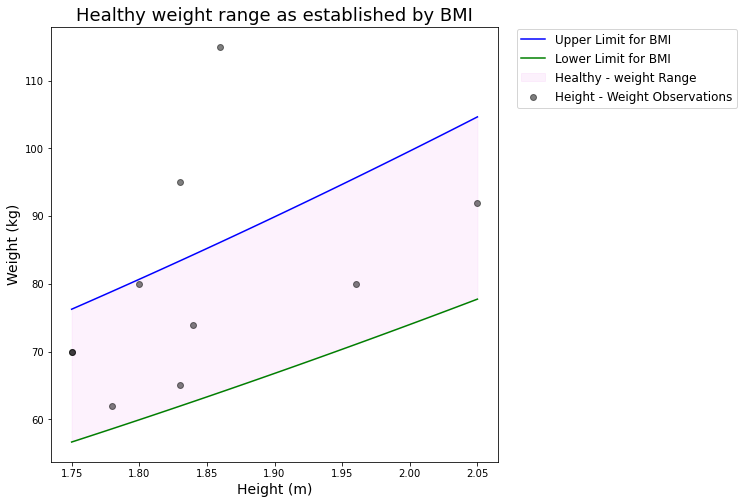

In [224]:
bmi_chart(info)

---
## Task 3: Instantaneous heart rate data

For each subject, the file `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period. Specifically, the two columns record the time at which each heartbeat was detected, and the interval (in seconds) between the current heartbeat and the previous one.

### Handling timestamp data

For the next tasks, you will use NumPy's `datetime64[s]` and `timedelta64[s]` object types, respectively used to represent times (as if read on a clock) and time intervals. You should [consult the relevant documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetimes-and-timedeltas).

Here are a few illustrative examples:

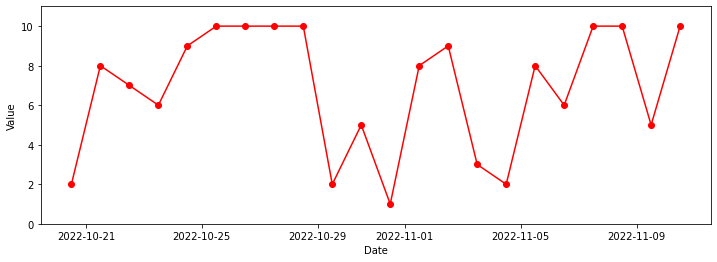

In [805]:
import numpy as np
import matplotlib.pyplot as plt

# Create two datetime objects and a vector of dates
start_time = np.datetime64('2022-10-20 12:00:00')
end_time = np.datetime64('2022-11-10 12:00:00')
time_vector = np.array(['2022-10-20', '2022-10-23', '2022-10-28'], dtype='datetime64[s]')
# print(time_vector)
# print(type(time_vector[0]))

# Get time interval between the two times
time_elapsed = end_time - start_time
# print(time_elapsed)
# print(type(time_elapsed))

# Divide by the duration of 1 second to get number of seconds (as a number object)
seconds_elapsed = time_elapsed / np.timedelta64(1, 's')
# print(seconds_elapsed)
# print(type(time_elapsed))

# Divide by the duration of 1 day to get number of days
days_elapsed = time_elapsed / np.timedelta64(1, 'D')
# print(days_elapsed)

# Create a range of datetimes spaced by 1 day
step = np.timedelta64(1, 'D')
days = np.arange(start_time, end_time + step, step)

# Plot something using days as the x-axis
fig, ax = plt.subplots(figsize=(12, 4))
value = np.random.randint(1, 11, size=len(days))
ax.plot(days, value, 'ro-')
ax.set(ylim=[0, 11], xlabel='Date', ylabel='Value')
plt.show()

---
🚩 ***Task 3a:*** Write a function `read_heartbeat_data(subject)` which takes as input an integer `subject` between 1 and 10, reads the data in `heartbeats.txt` for the given `subject`, and returns it as two NumPy vectors:

- `times`, containing the recorded times of each heartbeat (as `datetime64[s]` objects),
- `intervals`, containing the recorded intervals between heartbeats (in seconds, as `float` numbers).

**[3 marks]**

In [225]:
def read_heartbeat_data(subject):
    '''
    This function opens the heartbeats.txt file corresponding to a certain subject and returns two vectors
    with the recorded times of each heartbeat and the interval between the heartbeats.
    
    Inputs:
        subject (int): Integer between 1 and 10 (both included), corresponding to a certain preson in the study.
    
    Outputs:
        times (vector - 1D array): contains the recorded times of each heartbeat, as datetime64[s] objects.
        intervals (vector): contains the recorded intervals between heartbeats, in seconds, as floating point numbers.
    '''
    
    if isinstance(subject, int) != True: #If the input is not an integer...
        raise TypeError("Please input an integer representing a subject.") #...raise a TypeError
        
    if ((subject < 1) or (subject > 10)): #If the input is not between 1 and 10...
        raise ValueError("Please input an integer between 1 and 10, both included.") #...raise a ValueError
    
    subject_info = np.loadtxt(f'dataset/subject_{subject}/heartbeats.txt', dtype ="str", delimiter=',') #load
            #the required file
     
    times = subject_info[1:, 1] #save the recorded times of each heartbeat in a vector
    times = np.array(times, dtype='datetime64[s]') #change the type of the elements of the vector to datetime64[s]
    
    intervals = subject_info[1:, 2] #save the recorded intervals between heartbeats in a vector
    intervals = intervals.astype(float) #change the type of the elements of the vector to float
  
    return times, intervals #return the vectors recording times of heartbeats and intervals between heartbeats

In [226]:
times, intervals = read_heartbeat_data(3)

---
🚩 ***Task 3b:*** Write a function `hr_from_intervals(intervals)` which takes as input a NumPy vector containing heartbeat interval data (such as that returned by `read_heartbeat_data()`), and returns a NumPy vector of the same length, containing the instantaneous heart rates, in **beats per minute (BPM)**, calculated from the intervals between heartbeats. You should return the heart rates as floating-point numbers.

For instance, an interval of 1 second between heartbeats should correspond to a heart rate of 60 BPM.

**[2 marks]**

In [227]:
def hr_from_intervals(intervals):
    '''
    This function transforms the time between heartbeats to the corresponding beats per minute (BPM).
    
    Inputs:
        intervals (vector): Contains heartbeat interval data, as floating point numbers.
        
    Outputs:
        BPM (vector): Contains the instantaneous heart rates, in BPM, as floating point numbers.
    '''

    BPM = 1/intervals * 60 #transform interval between heeartbeats to corresponding BPM
    
    return BPM #return BPM vector

In [228]:
bpm = hr_from_intervals(intervals)

---
## Task 4: Data cleaning

There are gaps and measurement errors in the heartbeat data provided by the device. These errors will likely appear as outliers in the data, which we will now try to remove.

One possible method is to remove data points which correspond to values above and below certain **percentiles** of the data. Removing the data below the $p$th percentile means removing the $p\%$ lowest values in the dataset. (Note that, for instance, the 50th percentile is the median.)

---
🚩 ***Task 4a:*** Write a function `clean_data(times_raw, hr_raw, prc_low, prc_high)` which takes 4 inputs:

- `times_raw` is the NumPy array of timestamps returned by `read_heartbeat_data()`,
- `hr_raw` is the NumPy array of computed heart rate values returned by `hr_from_intervals()`,
- `prc_low` and `prc_high` are two numbers such that $0\leq$ `prc_low` $<$ `prc_high` $\leq 100$.

Your function should return two NumPy arrays of the same length, `times` and `hr`, which are the original arrays `times_raw` and `hr_raw` where all the measurements (heart rate and associated time stamp) below the `prc_low`th percentile and above the `prc_high`th percentile of the heart rate data have been removed.

You may wish to make use of NumPy functionality to calculate percentiles.

**[4 marks]**

In [229]:
def clean_data(times_raw, hr_raw, prc_low = 1, prc_high = 99): 
    '''
    This function is used to remove outliers/measurement errors in the data. It calculates the passed percentiles
    on "hr_raw" and returns two vectors: "hr" corresponds to the "hr_raw" observations that were within the given
    percentiles, and "times" corresponds to the "times_raw" observations associated to observations in "hr_raw"
    that were within the given percentiles. "times" and "hr" will be the same length.
    
    Inputs:
        times_raw (vector): Array of timestamps, as datetime64[s] objects.
        hr_raw (vector): Array of BPM values, as floating point objects.
        prc_low (int or float): Lower percentile to be calculated. Set to 1 by default. 
        prc_high (int or float): Higher percentile to be calculated. Set to 99 by default.
        
    Outputs:
        times (vector): Observations of "times_raw" whose associated observations in "hr_raw" are within the
                        given percentiles, as datetime64[s] objects.
        hr (vector): Observations of "hr_raw" within the given percentiles, as floating-point objects.
    
    '''
    
    if not(isinstance(prc_low, int) or isinstance(prc_low, float) or 
           isinstance(prc_high, int) or isinstance(prc_low, float)): #If "prc_low" or "prc_high" are not digits...
        raise TypeError("Please enter a numerical value for the percentiles to be calculated.") #raise TyperError

    if prc_low >= prc_high: #If "prc_low" is larger than or equal to "prc_high"...
        raise ValueError("Please input valid percentiles.") #raise ValueError
    
    if ((prc_low < 0) or (prc_low > 100)): #If "prc_low" is less than 0 or "prc_high" is more than 100
        raise ValueError("Please input percentiles in the correct range (between 0 and 100, both included).") #raise
                                                                                                        #valueError
    
    hr_high = np.percentile (hr_raw, prc_high) #calculate the 'prc_high' perecentile of heart rate
    hr_low = np.percentile (hr_raw, prc_low) #calculate the 'prc_low' percentile of heart rate
    
    
    hr = hr_raw[(hr_raw >= hr_low) & (hr_raw <= hr_high)] #keep heart rates between the percentile limits
    times = times_raw[(hr_raw >= hr_low) & (hr_raw <= hr_high)] #keep times associated with heart rates between
                                                        #the percentile limits
    
    
    return times, hr #return of arrays "times" and "hr", with no observations associated to heart rates outside the
                     #specified percentile limits
    


In [230]:
times_new, bpm_new = clean_data(times, bpm, 15, 85)

In [231]:
times_new, bpm_new = clean_data(times, bpm)

---
🚩 ***Task 4b:*** Write a function `evaluate_cleaning(subject)`, which takes as input an integer `subject` between 1 and 10 indicating the subject number, and plots the following two histograms for that subject:

- a histogram of the raw heart rate data,
- a histogram of the heart rate data after cleaning with `clean_data()`, where the bottom 1% and the top 1% of the values have been removed.

Your histograms should use a logarithmic scale on the y-axis, and be clearly labelled. You should consider carefully how to lay out the histogram to best present the information.

Your function `evaluate_cleaning()` should call the functions `read_heartbeat_data()`, `hr_from_intervals()`, and `clean_data()` you wrote above, in order to obtain the raw and cleaned heart rate data for a given `subject`.

Then, use your function to display the histograms of the raw and cleaned data for Subject 3. Given that heart rates in adults can typically range from about 40 to 160 beats per minute, and given your histograms, explain why this is a suitable method to remove likely measurement errors in the heart rate data.

**[3 marks]**

---

💾 *If you are stuck on Task 3 or on the task above, you can load the data provided in the `testing` folder to produce your histograms, by running the following commands:*

```python
times_raw = np.load('testing/times_raw.npy')
hr_raw = np.load('testing/hr_raw.npy')
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

In [1065]:
# References used in the following code cell:

# Line: 38 
# Author: @Jsowa
# URL: https://stackoverflow.com/questions/31006971/setting-the-same-axis-limits-for-all-subplots-in-matplotlib
# Year: 2020
# Last accessed on 09 Nov 2022.

In [232]:
def evaluate_cleaning(subject):
    '''
    This function is used to plot two histograms of the heart rate, for the original data and the cleaned data.
    It calls the functions read_heartbeat_data(), hr_from_intervals() and clean_data() to obtain the required 
    heart rates of the subject. The first histogram will use the complete heart rate data from the original dataset, 
    while the second histogram will only use a subset of it, the observations that are left after the data has been 
    cleaned (with the clean_data() function). By plotting the histograms one next to the other, we can observe 
    the differences between the two data inputs. The y-axis of the histograms are in logarithmic scale to appreaciate
    the differences in the frequencies with ease.
    
    Inputs:
        subject (int): integer from 1 to 10, representing the people for which there is data recorded.
    Outputs:
        none
    '''

    if isinstance(subject, int) != True: #If "subject" is not an integer...
        raise TypeError("Please input an integer representing a subject.") #raise a typeError
        
    if ((subject < 1) or (subject > 10)): #If "subject" is not between 1 and 10...
        raise ValueError("Please input an integer between 1 and 10, both included.") #raise ValueError
        
        
    times, intervals = read_heartbeat_data(subject) #obtain times, intervals of the heartbeats for the subject
    bpm = hr_from_intervals(intervals) #transform intervals to BPM
    
    clean_times, clean_bpm = clean_data(times, bpm, prc_low = 1, prc_high = 99) #produce clean data for times and
                                                    #heart rate from the original data
    
    
    fig, axs = plt.subplots(1, 2) #set both plots to stand in the same row
    plt.rcParams['figure.figsize'] = (16, 8) #set the sizing of the plots

    
    axs[0].hist(bpm, bins = 25, log = True, color = "blue", edgecolor='black', alpha=0.8) #histogram of raw data
    axs[0].set_title('Raw dataset', fontsize = 18) #add title to first plot
    axs[0].set(xlabel="Heart rate (BPM)", ylabel="log(frequency)") #add x and y - axis labels to first plot

    axs[1].hist(clean_bpm, bins = 25, log = True, color = "blue", edgecolor='black', alpha=0.8) #histogram of clean data
    axs[1].set_title('Clean data', fontsize = 18) #add title to second plot
    axs[1].set(xlabel="Heart rate (BPM)", ylabel="log(frequency)") #add x and y - axis labels to second plot
    
    plt.setp(axs, ylim=axs[0].get_ylim()) #set both histograms to have the same numbering in the y-axis (take the 
                    #numbering (limit) from the first histogram). Each histogram keeps their own x-axis limits.
        
    
    plt.show()
    


# https://stackoverflow.com/questions/31006971/setting-the-same-axis-limits-for-all-subplots-in-matplotlib

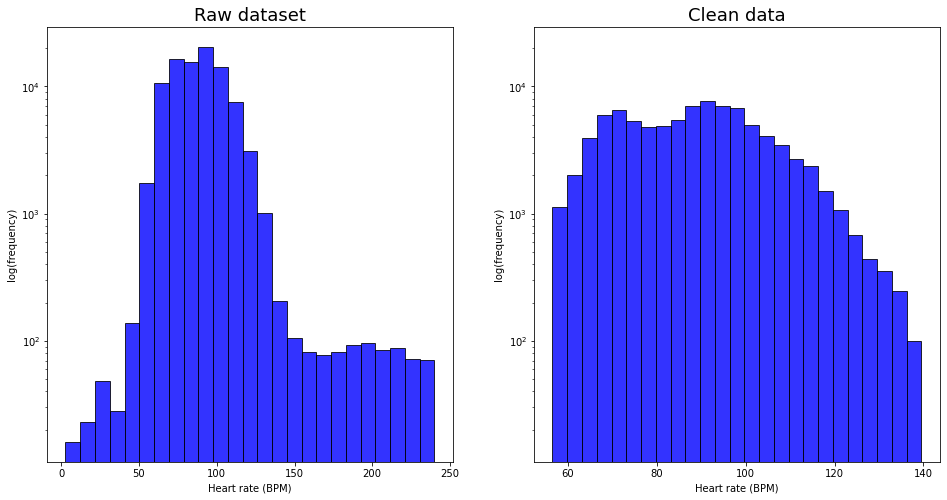

In [234]:
evaluate_cleaning(3)

The method applied in the clean_data() function to remove likely measurement errors in the heart rate data is working, and agrees with what can be expected in accordance to the scientific evidence. In particular, by using percentiles to clean the data, we got rid of the extreme observations (BPMs less than approximately 40 and BPMs larger than approximately 140). Eliminating these observations was the main objective, since humans rarely reach those heart rates in their daily activity. <br>
By looking at the graphs, we see that the first histogram (with raw data) contains the extreme values, while the second histogram (with cleaned data) does not. In particular, this is the only difference between the two histograms. By looking closely, we can observe that in fact the second graph corresponds to the “peak” in the first histogram, with slight differences caused by the bins. Both histograms have used 25 bins each, grouping together similar values and allowing to observe a general distribution. In particular, each bin is of equal-width, in the range of values that are passed to the function, which implies that the bins in the second histogram are “smaller” (this leads to the difference in shape between the “peak” of histogram 1 and histogram 2). <br>
Of course, it is possible that some of these really low/high BPM observations were not errors in the data collection, however it is really unlikely that all of them were correct observations, since humans do not usually surpass those limits of BPM in their regular daily activities. Thus, the goal of the clean_data() function has been achieved.


---
## Task 5: Interpolating the data

Although the device detecting heartbeats was able to measure intervals between beats with millisecond precision, the recorded timestamps could only record the second at which a heartbeat occurred. This means that there are not only time gaps in the data (due to the device missing heartbeats), but also several heartbeats usually recorded in the same second.

For example, this is an excerpt from Subject 7's data, showing a 9-second time gap between `09:19:57` and `09:20:06`, as well as 3 different heartbeats detected at `09:20:06`:

```
59,2022-07-21 09:19:56,1.033
60,2022-07-21 09:19:57,0.942
61,2022-07-21 09:20:06,0.307
62,2022-07-21 09:20:06,0.439
63,2022-07-21 09:20:06,0.297
64,2022-07-21 09:20:07,0.427
```

The goal of this next task is to **interpolate** the recorded data, in order to produce a new dataset containing values of the heart rate at regular time intervals. We will use **linear interpolation**, with the help of SciPy's `interp1d()` function (from the `interpolate` module) which we saw in Week 5.

---
🚩 ***Task 5a:*** The `interp1d()` function from SciPy can only be used with numeric data, and not timestamps. Two functions are provided for you below.

- Explain, in your own words, what both functions do and how.
- Write a few lines of test code which clearly demonstrate how the functions work.

**[2 marks]**

In [236]:
def datetime_to_seconds(times):
    return (times - times[0]) / np.timedelta64(1, 's')

def seconds_to_datetime(seconds_elapsed, start_time):
    return seconds_elapsed * np.timedelta64(1, 's') + start_time


# Demonstrating usage
dt_to_sec = datetime_to_seconds(np.array(['2022-10-20', '2022-10-23', '2022-10-28'], dtype='datetime64[s]'))
print(dt_to_sec)
print("Object type: ",type(dt_to_sec))
print("Type of elements in the array: ", type(dt_to_sec[0]))

dt_to_sec2 = datetime_to_seconds(np.array(['2022-10-20 12:00:00', '2022-10-20 12:00:05', '2022-10-20 13:00:00'],
                                          dtype='datetime64[s]'))
print(dt_to_sec2)


sec_to_dt = seconds_to_datetime(5, np.datetime64('2022-10-20 12:00:00'))
print(sec_to_dt)
print("Object type:", type(sec_to_dt))

sec_to_dt2 = seconds_to_datetime(1, np.datetime64('2022-10-20'))
print(sec_to_dt2)

[     0. 259200. 691200.]
Object type:  <class 'numpy.ndarray'>
Type of elements in the array:  <class 'numpy.float64'>
[   0.    5. 3600.]
2022-10-20T12:00:05
Object type: <class 'numpy.datetime64'>
2022-10-20T00:00:01


The function `datetime_to_seconds(times)`is used to calculate time distance (in seconds) between points in time. The function takes an array ("times") of datetime64[s] objects , and calculates the time interval between every element in the array and the first one.  Then, each of these intervals is divided by the duration of 1 second, transforming them to a number object (a float, representing seconds). Finally, the function returns an array, of the same length as the input, with the calculated time intervals expressed as a floating point objects (representing seconds).


The function `seconds_to_datetime(seconds_elapsed, start_time)` returns a point in time, considering an initial reference point and a certain number of seconds. For this, it takes two inputs: "seconds_elapsed" accounts for a certain number of seconds, and "start_time" is the reference point in time from where the function starts counting. The function works in the following way, firstly it transforms the input "seconds_elapsed" to a timedelta64[s] object, by multiplying it by the duration of 1 second. Then, it simply adds those seconds to "start_time", a datetime64[s] object, and returns this sum.




---
🚩 ***Task 5b:*** Write a function `generate_interpolated_hr(times, hr, time_delta)` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object representing a time interval in seconds,

and returns two new NumPy vectors, `times_interp` and `hr_interp`, such that:

- `times_interp` contains regularly spaced `datetime64[s]` timestamps, starting at `times[0]`, ending on or less than `time_delta` seconds before `times[-1]`, and with an interval of `time_delta` between consecutive times.
- `hr_interp` contains the heart rate data obtained using **linear interpolation** and evaluated at each time in `times_interp`, for example with the help of the `interp1d()` function from `scipy.interpolate`.

For example, if `times` starts at `10:20:00` and ends at `10:20:09` with a `time_delta` of two seconds, then your `times_interp` vector should contain `10:20:00`, `10:20:02`, `10:20:04`, `10:20:06`, `10:20:08`, and `hr_interp` should consist of the corresponding interpolated heart rate values at each of those times.

**[4 marks]**

In [237]:
from scipy.interpolate import interp1d

def generate_interpolated_hr(times, hr, time_delta):
    ''' 
    This function produces a vector ("times_interp") of evenly spaced times between the first and last 
    elements of "times", with an interval of time_delta. "times_interp" is then used to evaluate "hr_interp", 
    which contains heart rate data produced by linear interpolation. The function returns both "times_interp"
    and "hr_interp".
    
    Inputs:
        times (vector): Array of timestamps, contains datetime64[s] objects.
        hr (vector): Array of heart rate values, as floating point objects.
        time_delta (timedelta64[s]): Required interval between consecutive times for the interpolation.
        
    Outputs:
        times_interp (vector): Evenly spaced times between the first and last elements of "times", with an interval
                                of "time_delta", as datetime64[s] objects.
        hr_interp (vector): heart rate data produced by linear interpolation, as floating point objects.
    
    '''
    
    times_interp = np.arange(times[0], times[-1] + 1, time_delta) #generate evenly spaced times with an interval of
                    # "timedelta", ranging from the first to the last element in "times" (both included)
    func = interp1d(datetime_to_seconds(times), hr) #linear interpolation from original data
    
    x = datetime_to_seconds(times_interp) #transform the datetime64[s] objects to float points (measuring seconds)

    hr_interp = func(x) #evaluates evenly spaced times using the interpolation function and produces heart rate data
    
    return times_interp, hr_interp #return the vectors of evenly spaced times and heart rate interpolated data

In [238]:
times_interp, hr_interp = generate_interpolated_hr(times_new, bpm_new, 7)

---
🚩 ***Task 5c:*** Check your `generate_interpolated_hr()` function by generating interpolated heart rate data for Subject 1 for just the first 100 measurements (after cleaning). You should generate interpolated data with a time interval of 5 seconds. Plot the data points, as well as your interpolated data, and discuss in the Markdown cell below whether your plot is what you expected, and why.

**[2 marks]**

---
💾 *If you are stuck on Task 4, you can use the cleaned data provided in the `testing` folder to check your code, by running the following commands:*

```python
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

In [239]:
times_s1, intervals_s1 = read_heartbeat_data(subject = 1) #obtain times, intervals of heartbeats for subject 1
hr_s1 = hr_from_intervals(intervals_s1) #transform intervals to BPM
clean_times_s1, clean_hr_s1 = clean_data(times_s1, hr_s1, prc_low = 1, prc_high = 99) #clean times and heart rate
times_interp_s1, hr_interp_s1 = generate_interpolated_hr(clean_times_s1[:100], clean_hr_s1[:100], time_delta = 5)
        #obtain evenly spaced times and interpolated heart rate data

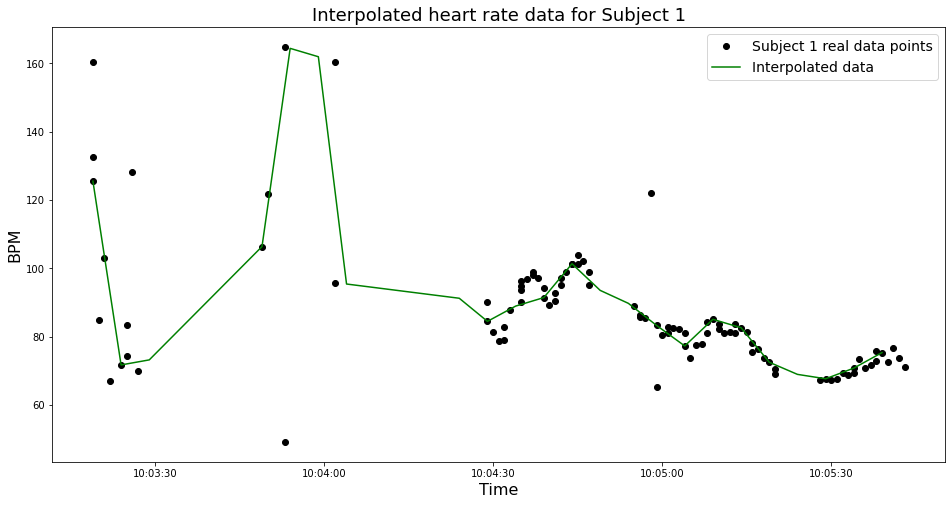

In [240]:
plt.plot(clean_times_s1[:100], clean_hr_s1[:100], 'o', color = "black") #plot first 100 observations of cleaned, 
                                                                        #original data
plt.plot(times_interp_s1, hr_interp_s1, "-", color = "green") #plot interpolated data
plt.title("Interpolated heart rate data for Subject 1", fontsize = 18) #add title
plt.xlabel("Time", fontsize = 16) #add x-axis label
plt.ylabel("BPM", fontsize = 16) #add y-axis label
plt.legend(["Subject 1 real data points", "Interpolated data"], fontsize = 14) #add legend
plt.show() #show plot

The data plot shown is similar to what was expected. The initial observations of the heart rate of subject 1 (as well as other subjects) are slightly imprecise, probably due to the time it takes to set and make the heart rate monitor work. During this setting up process, the heart rate monitor starts recording data, but for the first few minutes it is a bit inaccurate (by checking the raw  data file, we see that for some of the first observations of "interval between heartbeats", the recorded values are larger than 3 seconds, and many others are less than 0.4 seconds). This inacurracy leads to having a "clean data" with missing observations for the first couple of minutes, and from then onwards the data recorded is more reliable (as observed in the graph, there is a moment where the original data points are placed closely on to another). 

Thus, it is normal to see this kind of graph, where the left half is missing some real data points and the interpolation struggles to define a clear trend, and from the moment when the real data points are collected accurately, the interpolation is much more precise and the trend is smoother, going through many of the real data points.


---
## Task 6: Smoothing the data with a rolling average

A rolling average is simply an average of the heart rate data, calculated over a given window of time. For example:

- The 20-second rolling average of the heart rate at a time `10:20:00` is the average heart rate over the 20 seconds leading up to that time, i.e. the average of all the heart rates between `10:19:41` and `10:20:00` (inclusive). If we have measurements of the heart rate every 5 seconds, then this would be the average of the heart rates measured at `10:19:45`, `10:19:50`, `10:19:55`, and `10:20:00`.
- We can similarly calculate the 20-second rolling average at the next measurement time, `10:20:05`, as the average heart rate over the 20-second period from `10:19:46` to `10:20:05` (inclusive).

The rolling average essentially smoothes out the sudden jumps in the measured (or interpolated) heart rate data, allowing us to see the longer-term variations more clearly.

---
🚩 ***Task 6:*** Write a function `rolling_average()` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object `time_delta` representing a time interval in seconds,
- a `timedelta64[s]` object `window`, representing the window duration in seconds (with `window` assumed to be an integer multiple of `time_delta`),

and returns a NumPy vector `hr_rolling` containing values for the rolling average of the heart rate over time, with the given window size.

Your `rolling_average()` function should call `generate_interpolated_hr()` to generate regularly-spaced heart rate data with a time interval `time_delta`, before computing and returning the averaged heart rate data.

Note that `hr_rolling` will be shorter than the length of your interpolated heart rate data, because you can only start computing rolling averages after one window of time has elapsed. (For instance, if your data starts at `10:20:00`, with a 30-second window, the first value of the rolling average you can obtain is at `10:20:29`.)

**[4 marks]**

In [241]:
def rolling_average(times, hr, time_delta, window):
    '''   
    This function calls generate_interpolated_hr() to generate regularly-spaced heart rate data with a time 
    interval "time_delta", and calculates the rolling average of the heart rate in the window of time that is 
    specified. The function returns an array with the rolling average for all the heart rates (whose rolling average
    can be calculated - all but the first ("window" / "time_delta") observations).
    
    Inputs:
        times (vector): Array of timestamps, contains datetime64[s] objects.
        hr (vector): Array of heart rate values, as floating point objects.
        time_delta (timedelta64[s]): Interval between consecutive times for the interpolation.
        window (timedelta64[s]): Window duration for calculating the rolling average. It is a multiple of time_delta. 
    Outputs:
        hr_rolling (vector): Rolling average of the heart rate observations in the specfied window, as floating point
                            objects.    
    '''

    if window % time_delta != 0: #If "window" is not a multiple of "time_delta"...
        raise ValueError('Please choose a window that is a positive multiple of time delta.')#... raise valueError

    proportion_window_timedelta = int(window / time_delta) #Calculate the ratio of "window" and "time_delta"

    times_interp, hr_interp = generate_interpolated_hr(times, hr, time_delta) #generate interpolated data
    
    means = [] #create empty list to record rolling average
    
    for i in range(len(hr_interp) - proportion_window_timedelta): #for the number of element for which you can
                                                                  #calculate the rolling average...
        rolling_mean = np.mean(hr_interp[i:i + proportion_window_timedelta]) #calculate rolling average
                                                                            #according to the specified window
        means.append(rolling_mean) #add rolling average value to the list

        
    hr_rolling = np.array(means) #transform list to numpy array
  
    return hr_rolling #return array with the rolling averages

---
## Task 7: Putting it all together

You should now have a series of functions which allow you to:

- read data on measured heartbeart-to-heartbeat intervals for a given subject,
- transform this data into heart rate measurements and clean out the outliers,
- interpolate the data to generate measurements at regular time intervals,
- compute a rolling average of the heart rate data over time, to smooth out the data.

For each subject, there is another file `actigraph.txt`, containing activity data recorded by a separate device. In particular, this data provides another independent measurement of the subjects' heart rate. We can use this to check our work.

---
🚩 ***Task 7:*** Write a function `display_heart_rate(subject)` which takes as input an integer `subject` between 1 and 10, and produces one single graph, containing two plots on the same set of axes:

- a plot of the heart rate data found in `actigraph.txt` over time,
- a plot of the smoothed heart rate data computed by you from the data in `heartbeats.txt`, using interpolated measurements of the heart rate every 3 seconds, and a 30-second window size for the averaging.

Your plot should show good agreement between the two sets of data. Instead of showing the full 24 hours of data, you should choose a period of time over which to plot the heart rate (say, approximately 1 hour), in order to better visualise the results.

Show an example by using your function to display the results for 3 subjects of your choice.

**[4 marks]**

---
💾 *If you are stuck on Task 5 or 6, you can use the actigraph heart rate data provided in the `testing` folder in `actigraph.txt`, and compare this to the smoothed heart rate data provided in the `testing` folder, which you can load by running the following command:*

```python
hr_rolling = np.load('testing/hr_rolling.npy')
```

In [243]:
def display_heart_rate(subject):
    '''
    This function produces two plots in the same graph. The first plot shows the heart rate data over time
    found in the text file actigraph.txt, while the second plot shows heart rate data from the the file
    heartbeats.txt, using interpolated measurements of the heart rate every 3 seconds, and a 30-second window size
    for the rolling average. To ease the analysis, the plot only shows data from a 1-hour interval, pre-specified 
    to start one hour after data begins to be recorded, and finishing one hour after that. 
    This function has to call previously defined functions:
    read_heartbeat_data(), hr_from_intervals(), clean_data(), generate_interpolated_hr(), rolling_average().
    
    Inputs:
        subject (int): Integer between 1 and 10 (both included), corresponding to a certain preson in the study.
    Outputs:
        none
    '''

    if isinstance(subject, int) != True:    #If "subject" is not an integer...
        raise TypeError("Please input an integer representing a subject.") #... raise Typer Error
        
    if ((subject < 1) or (subject > 10)): #If "subject is not in the 1-10 range..."
        raise ValueError("Please input an integer between 1 and 10, both included.") #... raise ValueError
    
    subject_acti = np.loadtxt(f'dataset/subject_{subject}/actigraph.txt', dtype = "str", delimiter = ",") #load
            #actigraph.txt file for the required subject
    
    sub_acti_hr = subject_acti[1:, 2] #take heart rate values from actigraph
    sub_acti_hr = sub_acti_hr.astype(float) #trasform hear rate values to float point objects
    
    sub_acti_time = subject_acti[1:, 1] #take 'time' values from actigraph
    sub_acti_time = np.array(sub_acti_time, dtype='datetime64[s]') #trasform 'time' values to datetime64[s] objects   
    
    times, intervals = read_heartbeat_data(subject) #load heartbeats.txt file for the required subject
    hr = hr_from_intervals(intervals) #transform time intervals to heart rate values
    clean_times, clean_hr = clean_data(times, hr, prc_low = 1, prc_high = 99) #clean the data obtained from
                                                                                #heartbeats.txt

        
    time_delta = 3 #pre-define interval between consecutive times for interpolation
    window = 30 #pre-define window for rolling average
    
    times_interp, hr_interp = generate_interpolated_hr(clean_times, clean_hr, time_delta) #interpolate 
                                                                                        #heart rate data
    rolling_avg_hr = rolling_average(clean_times, clean_hr, time_delta, window) #calculate rolling average
    
    proportion_window_timedelta = int(window / time_delta) #calculate proportion between "window" and "time_delta"
    times_interp_cut = times_interp[proportion_window_timedelta:] #keep only the times for which rolling average 
                                                                    #can be calculated
    
    start_interval_time = times_interp_cut[0] + np.timedelta64(1, 'h') #establish starting time for the plot visualization
    finish_interval_time = times_interp_cut[0] + np.timedelta64(2, 'h') #establish finsihing time for the plot visualization
    
    
    
    
    plt.plot(times_interp_cut[(times_interp_cut > start_interval_time) & (times_interp_cut < finish_interval_time)],
            rolling_avg_hr[(times_interp_cut > start_interval_time) & (times_interp_cut < finish_interval_time)])
                #plot interpolated data from heartbeats.txt file
        
    plt.plot(sub_acti_time[(sub_acti_time > start_interval_time) & (sub_acti_time < finish_interval_time)],
            sub_acti_hr[(sub_acti_time > start_interval_time) & (sub_acti_time < finish_interval_time)])
                #plot data from actigraph.txt file
    
    plt.legend(["Smoothed data", "Actigraph data"]) #add legend
    plt.xlabel("Time", fontsize = 18)    #add x-label
    plt.ylabel("BPM", fontsize = 14) #add  y-label
    plt.title(f"BPM record comparison of actigraph and smoothed data for subject {subject}", fontsize = 18) #add title
    
    plt.show() #show the plot

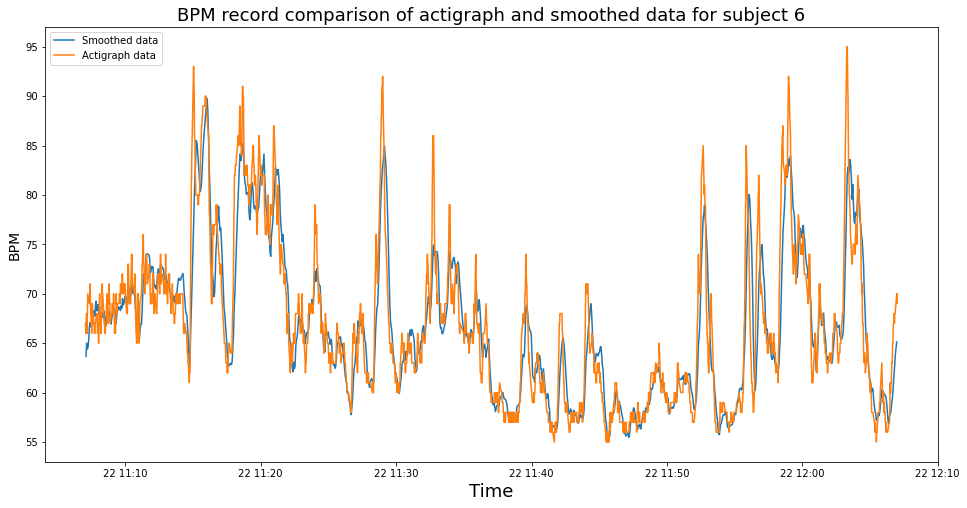

In [244]:
display_heart_rate(6) #Plots for subject 6

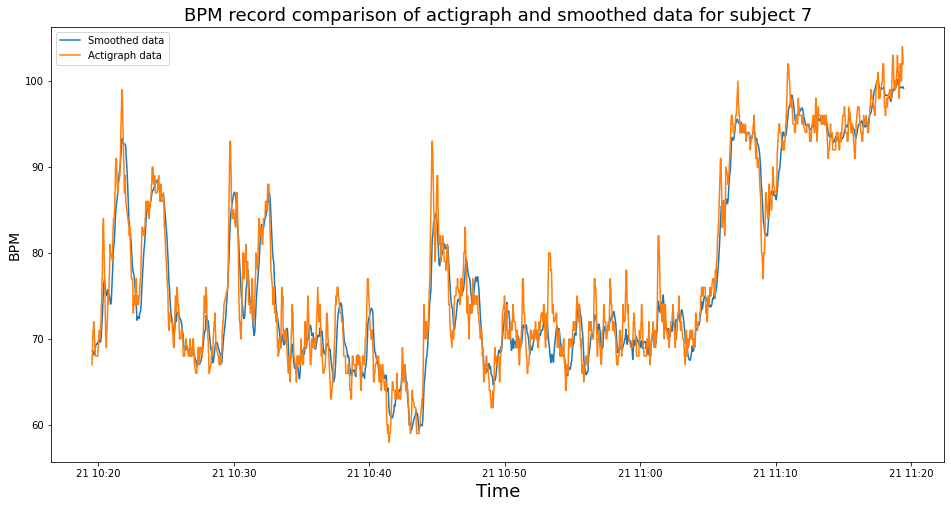

In [245]:
display_heart_rate(7) #Plots for subject 7

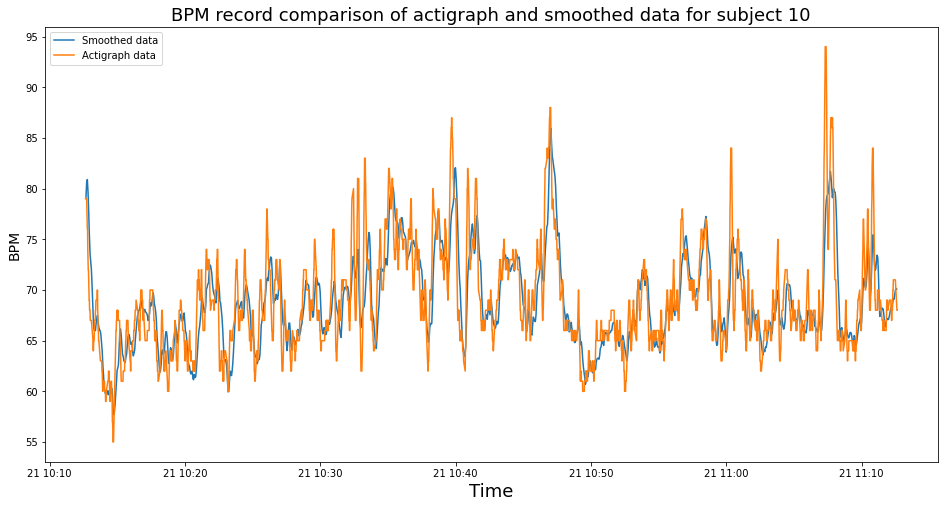

In [246]:
display_heart_rate(10) #Plots for subject 10

---
## Task 8: relating to other data

The data in `actigraph.txt` also contains the following columns:

- `Steps` indicates the number of steps detected per second (using a pedometer).
- `Inclinometer Standing`/`Sitting`/`Lying` indicates the position of the subject, automatically detected by the device.
- `Inclinometer Off` indicates when the device didn't record a position.

In particular, the `Inclinometer ...` columns record either `0` or `1`, and they are mutually exclusive over each row. This means that, for example, a subject can't be recorded simultaneously sitting and standing.

---
🚩 ***Task 8:*** Using the results of your data processing work in previous tasks, can you relate some of this additional data (and/or some of the data in `subject_info.txt`) to the heart rate estimates that you have obtained?

You are free to choose how you complete this task. You will be assessed on the correctness of your code and analysis, the quality of your code (readability, commenting/documentation, structure), and the presentation of your results.

Note that you do not have to use **all** of the extra data to obtain full marks.

**[5 marks]**

---
💾 *If you are using `hr_rolling.npy` and the actigraph data in the `testing` folder, this is the information for this person:*

| Weight | Height | Age |
|:-:|:-:|:-:|
| 85 | 180 | 27 |

# Reading actigraph data

In [247]:
def read_acti_info(subject):
    '''
    This function reads the text file 'actigraph.txt' for a specific subject. From that text file, it returns
    8 vectors, corresponding to each of the columns of the text file.
    
    Inputs: 
        subject (int): Integer from 1 to 10, representing a person in the study.
        
    Returns:
        headers (vector): contains the header of each column in the text file, as strings.
        times (vector): contains the recorded times of each heartbeat, as datetime64[s] objects.
        hr (vector): contains the recorded BPM, as floating point numbers.
        steps (vector): contains numer of steps detected per second, as floating point numbers.
        inc_off (vector): 1 if the position of the person could not be registered, 0 otherwise, as a floating point.
        stand (vector): 1 if the person was standing, 0 otherwise, as a floating point.
        sit (vector): 1 if the person was sit down, 0 otherwise, as a floating point.
        lying (vector) :  1 if the person was lying, 0 otherwise, as a floating point.
    '''    
    
    actigraph = np.loadtxt(f'dataset/subject_{subject}/actigraph.txt', dtype = "str", delimiter = ",") 
            #load actigraph.txt file for the required subject

    headers = actigraph[0].tolist() #use first row of file to obtain the headers of the columns
        
    times = actigraph[1:, 1] #obtain times from the second column of the file
    times = np.array(times, dtype='datetime64[s]') #transform to datetime64[s] objects

    hr = (actigraph[1:, 2]).astype(float) #save heart rate data, as floating point
    steps = (actigraph[1:, 3]).astype(float) #save steps data, as floating point
    inc_off = (actigraph[1:, 4]).astype(float) #save whether position could not be recorded, as floating point
    stand = (actigraph[1:, 5]).astype(float) #save whether the person was standing, as floating point
    sit = (actigraph[1:, 6]).astype(float) #save whether the person was sitting down, as floating point
    lying = (actigraph[1:, 7]).astype(float) #save whether the person was lying down, as floating point
    
    return headers, times, hr, steps, inc_off, stand, sit, lying #return list containing headers and  
                                     # arrays containing numerical information for each person
    


In [248]:
def read_all_info():
    '''
    This function reads the actigraph.txt file for all subjects studied, and returns 7 vectors, 
    corresponding to each of the numerical columns of the text file. It calls the previously defined funtion
    read_acti_info(subject)
    
    Inputs: 
        none
        
    Returns:
        alltimes (vector): contains the recorded times of each heartbeat of every subject, as datetime64[s] objects.
        allhr (vector): contains the recorded BPMs of every subject, as floating point numbers.
        allsteps (vector): contains numer of steps detected per second of every subject, as floating point numbers.
        allinc_off (vector): 1 if the position of the person could not be registered , 0 otherwise, as a floating point,
                    for every subject.
        allstand (vector): 1 if the person was standing, 0 otherwise, as a floating point, for every subject.
        allsit (vector): 1 if the person was sit down, 0 otherwise, as a floating point, for every subject.
        alllying (vector) :  1 if the person was lying, 0 otherwise, as a floating point, for every subject.
    '''
    alltimes = np.array([], dtype='datetime64[s]') #create empty array to record the "times" for each subject
    allhr = np.array([]) #create empty array to record the heart rates for each subject
    allsteps = np.array([]) #create empty array to record the steps for each subject
    allinc_off = np.array([]) #create empty array to record the moments when the position was not recorded,
                                #for each subject
    allstand = np.array([]) #create empty array to record the moments when each subject was standing
    allsit = np.array([]) #create empty array to record the moments when each subject was sitting
    alllying = np.array([]) #create empty array to record the moments when each subject was lying
    
    for subject in range(1,11): #for every subject...
        _, times, hr, steps, inc_off, stand, sit, lying = read_acti_info(subject) #obtain numerical data from actigraph.txt
        
        alltimes = np.append(alltimes, times) #append "times" to the array keeping all time values
        allhr = np.append(allhr, hr) #append "heart rates" to the array keeping all heart rate values
        allsteps = np.append(allsteps, steps) #append "steps" to the array keeping all step values
        allinc_off = np.append(allinc_off, inc_off) #append boolean for whether the position was not recorded
                                                    #to the array keeping these values
        allstand = np.append(allstand, stand) #append boolean for whether the position was standing
                                                #to the array keeping these values
        allsit = np.append(allsit, sit) #append boolean for whether the position was sitting down
                                        #to the array keeping these values
        alllying = np.append(alllying, lying) #append boolean for whether the position was lying down
                                                #to the array keeping these values
    
    return  alltimes, allhr, allsteps, allinc_off, allstand, allsit, alllying #return arrays containing numerical 
                                            #information of all the subjects


In [249]:
headers, times, hr, steps, inc_off, stand, sit, lying = read_acti_info(2) #load actigraph data for subject 2




In [250]:
alltimes, allhr, allsteps, allinc_off, allstand, allsit, alllying = read_all_info() #load data for all subjects 
                                                                                    # alltogether

# Clean data

In [251]:
def clean_all_data(times, steps, inc_off, stand, sit, lying, hr):
    '''
    This function takes a series of arrays and cleans their observations by calling the function clean_data(),
    with respect to the observations in an array "hr". All the arrays returned have the same length.
    
    Inputs:
        times (vector): contains the recorded times of each heartbeat, as datetime64[s] objects.
        steps (vector): contains numer of steps detected per second, as floating point numbers.
        inc_off (vector): 1 if the position of the person could not be registered, 0 otherwise, as a floating point. 
        stand (vector): 1 if the person was standing, 0 otherwise, as a floating point.
        sit (vector): 1 if the person was sit down, 0 otherwise, as a floating point.
        lying (vector) :  1 if the person was lying, 0 otherwise, as a floating point.
        hr (array): heart rate observations as floating point objects, which will be the base for cleaning the data
                    by eliminating extreme values. 
        
    Outputs:
        times_new (vector): cleaned times array, as datetime64[s] objects.
        steps_new (vector): cleaned steps array, as floating point numbers.
        stand_new (vector): cleaned stand array, as floating points.
        sit_new (vector): cleaned sit array, as floating points.
        lying_new (vector) : cleaned lying array, as floating points.
        inc_off_new (vector): cleaned inc_off array, as a floating points. 
        bpm_new (array): Array of heart rates, after eliminating outliers in the data. As floating-pint objects.
    
    
    '''

    times_new, bpm_new = clean_data(times, hr) #keep observations of heart rate and times that are within the percentiles
    steps_new, bpm_new = clean_data(steps, hr) #keep observations of steps and heart rate that are within the percentiles
    stand_new, bpm_new = clean_data(stand, hr) #keep observations of standing position and heart rate that are within the percentiles
    sit_new, bpm_new = clean_data(sit, hr) #keep observations of sitting position and heart rate that are within the percentiles
    lying_new, bpm_new = clean_data(lying, hr) #keep observations of lying position and heart rate that are within the percentiles
    inc_off_new, bpm_new = clean_data(inc_off, hr) #keep observations where "no position is recorded" and heart rate 
                                    #that are within the percentiles
    
    return times_new, steps_new, stand_new, sit_new, lying_new, inc_off_new, bpm_new #return arrays containing
                                                        #numerical information after being cleaned.



In [252]:
times_new, steps_new, stand_new, sit_new, lying_new, inc_off_new, bpm_new = clean_all_data(times, steps, inc_off, stand, sit, lying, hr)

# Correlation analysis

### Correlation between steps and position

In the following cell we observe the correlation matrices between the number of steps and the positions recorded in actigraph.txt. In particular, the first matrix shows the correlation for those variables in subject 2. We can see there is a positive correlation between steps and being stand up, and a negative correlation between steps and being sit down or lying down. It is also interesting to see that when no position was recorded, it was also associated with a lower number of steps. 

These findings can be generalized to all players, as shown in the second correlation matrix.

In [253]:
position = [stand_new, sit_new, lying_new, inc_off_new] #list of variables to analyse correlation - for subject 2
position_all = [allstand_new, allsit_new, alllying_new, allinc_off_new] #list of variables to analyse correlation -
                                                                # - for all subjects

print("Steps          ", "Standing    ", "Sitting    ", "Lying    ", "No data")
print(np.corrcoef(steps_new, position)) #Print correlation matrix from subject 2 data
print()
print("Steps          ", "Standing    ", "Sitting    ", "Lying    ", "No data")
print(np.corrcoef(allsteps_new, position_all)) #Print correlation matrix from all subjects' data


Steps           Standing     Sitting     Lying     No data
[[ 1.          0.58216867 -0.25239248 -0.10438355 -0.20257273]
 [ 0.58216867  1.         -0.44089675 -0.19121704 -0.33147757]
 [-0.25239248 -0.44089675  1.         -0.28048882 -0.48623152]
 [-0.10438355 -0.19121704 -0.28048882  1.         -0.21087874]
 [-0.20257273 -0.33147757 -0.48623152 -0.21087874  1.        ]]

Steps           Standing     Sitting     Lying     No data
[[ 1.          0.54353872 -0.24014412 -0.15275932 -0.22440397]
 [ 0.54353872  1.         -0.4626943  -0.28922572 -0.38316489]
 [-0.24014412 -0.4626943   1.         -0.26441882 -0.35030082]
 [-0.15275932 -0.28922572 -0.26441882  1.         -0.21896965]
 [-0.22440397 -0.38316489 -0.35030082 -0.21896965  1.        ]]


### Correlation between BPM and positions

In the following cell we also analyse the correlation between the BPM data and the recorded positions of the subject. Again, there are two matrices, the first one showing the results for the data of subject 2, and the second one with the data of all the subjects. As expected, standing up is positively correlated with higher BPM, however sitting or lying down is not correlated with the heart rate (perhaps surprisingly, since we could expect these positions of "relax" to yield lower BPMs). It is interesting to note that those observations when there is no data recorded are highly negatively correlated to lower BPMs.

In [254]:
print("Heart rate     ", "Standing    ", "Sitting    ", "Lying    ", "No data")
print(np.corrcoef(bpm_new, position)) #Print correlation matrix from subject 2 data
print()
print("Heart rate     ", "Standing    ", "Sitting    ", "Lying    ", "No data")
print(np.corrcoef(allbpm_new, position_all)) #Print correlation matrix from all subjects' data

Heart rate      Standing     Sitting     Lying     No data
[[ 1.          0.4884671  -0.1149653   0.0332986  -0.36163747]
 [ 0.4884671   1.         -0.44089675 -0.19121704 -0.33147757]
 [-0.1149653  -0.44089675  1.         -0.28048882 -0.48623152]
 [ 0.0332986  -0.19121704 -0.28048882  1.         -0.21087874]
 [-0.36163747 -0.33147757 -0.48623152 -0.21087874  1.        ]]

Heart rate      Standing     Sitting     Lying     No data
[[ 1.          0.40973684 -0.00471534 -0.05032823 -0.41635827]
 [ 0.40973684  1.         -0.4626943  -0.28922572 -0.38316489]
 [-0.00471534 -0.4626943   1.         -0.26441882 -0.35030082]
 [-0.05032823 -0.28922572 -0.26441882  1.         -0.21896965]
 [-0.41635827 -0.38316489 -0.35030082 -0.21896965  1.        ]]


### Correlation between BPM and steps

Lastly, we evaluate the correlation between heart rate and steps recorded. Unsurprisingly, these values are positiveely correlated, even if this correlation is not too strong. Again, we show two correlation matrices below, the first one corresponding to the data of subject 2, and the second one to the data of all the subjects.

In [255]:
print("Heart rate     ", "Steps")
print(np.corrcoef(bpm_new, steps_new)) #Print correlation matrix from subject 2 data
print()
print("Heart rate     ", "Steps")
print(np.corrcoef(allbpm_new, allsteps_new)) #Print correlation matrix from all subjects' data

Heart rate      Steps
[[1.         0.38638848]
 [0.38638848 1.        ]]

Heart rate      Steps
[[1.         0.33901919]
 [0.33901919 1.        ]]


# Graphical analysis

Next, some graphical analysis is performed by producing boxplots of the number of steps against the heart rates recorded. Note that there are 5 unique values recorded for the number of steps, either 0, 1, 2, 3 or 4. By plotting these variables with the data of all subjects, the following results are obtained: As expected, higher number of steps leads to a higher heart rate. This is a common trend except for steps = 4, that is related to lower average heart rate then steps = 3 or steps = 2. Assuming there is no errors in the data collection, this phenomenom can be due to the fact that people who record steps = 4 are exercising (running), and are generally fit. Thus, even if they are running, since they might be in shape and used to doing exercise, they do not get to high heart rates. This way, people who are less fit never record steps = 4, but when they reach steps = 3 they might feel exhausted, pushing the average heart rate up.

These boxplots have been generated using the data for all the subjects.

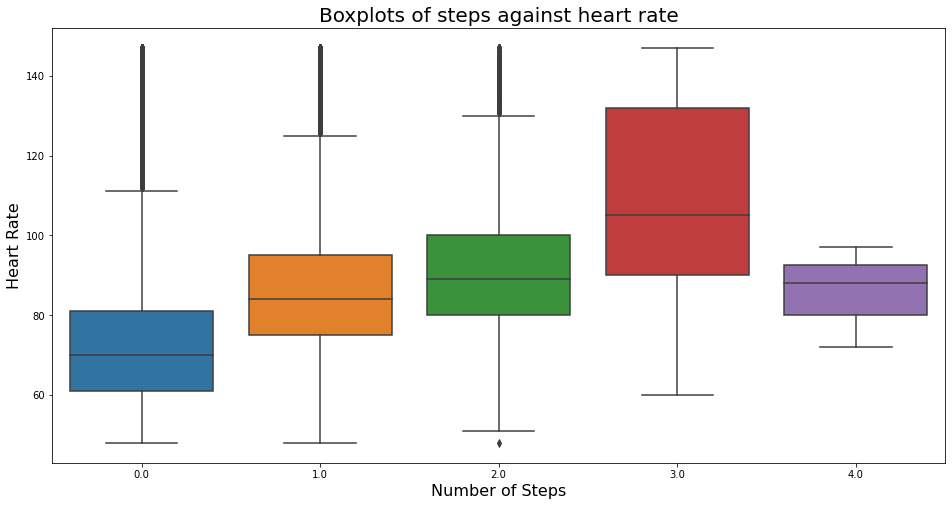

In [256]:
ax = sns.boxplot(x = allsteps_new,y = allbpm_new) #define the boxplot figures
plt.xlabel('Number of Steps', fontsize=16) #produce x-axis label
plt.ylabel('Heart Rate',fontsize=16) #produce y-axis label
plt.title("Boxplots of steps against heart rate",fontsize=20) #add title
plt.show() #show plot

In the next cell we plot  boxplots with the different positions against their corresponding heart rate. In agreement with the previous results, we see that being stand up is associated with higher heart rate, while those observations which had no recorded data on the position of the subject are associated with a lower heart rate. Being either sitting or lying yields no apparent differences in the expected heart rate of the subject.

These plots have been generated using the data for all the subjects.

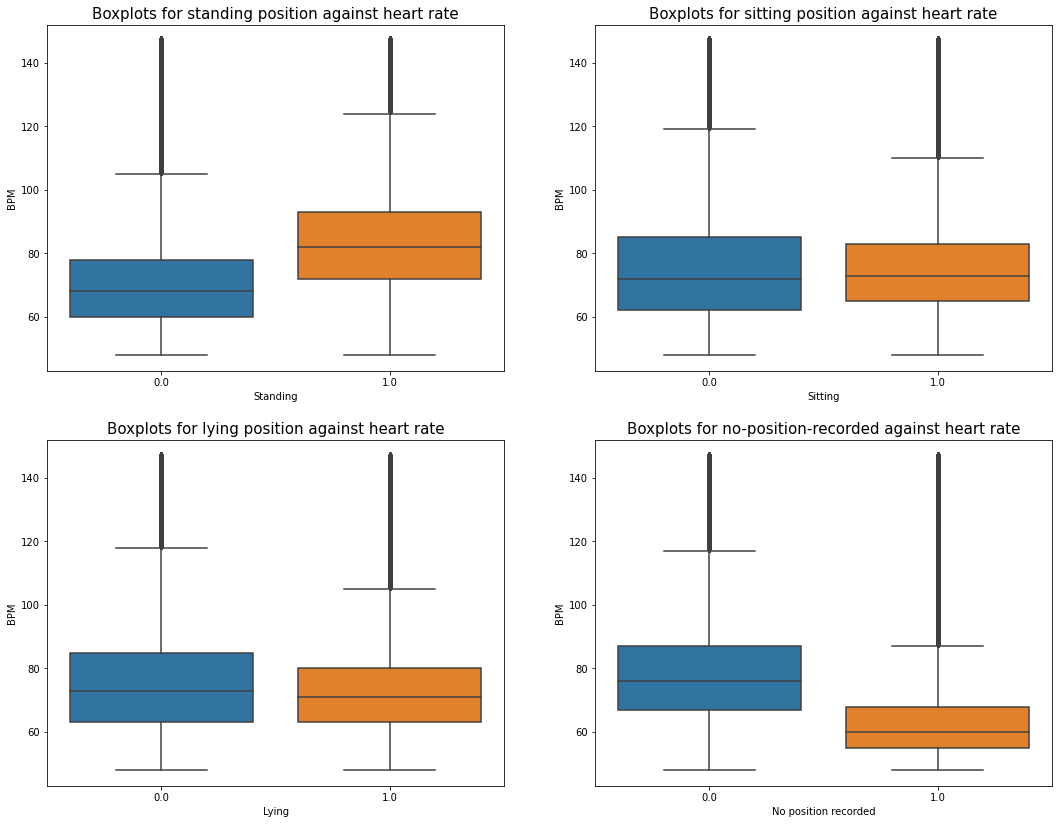

In [258]:
fig, axs = plt.subplots(2, 2) #set positioning of the plots 
plt.rcParams['figure.figsize'] = (18, 14) #set the sizing of the plots

axs[0, 0] = sns.boxplot(x = allstand_new, y = allbpm_new, ax=axs[0, 0]) #add first boxplot - standing position
axs[0, 1] = sns.boxplot(x = allsit_new, y = allbpm_new, ax=axs[0, 1]) #add second boxplot - sitting position
axs[1, 0] = sns.boxplot(x = alllying_new, y = allbpm_new, ax=axs[1, 0]) #add third boxplot - lying position
axs[1, 1] = sns.boxplot(x = allinc_off_new, y = allbpm_new, ax=axs[1, 1]) #add fourth boxplot - no record on position

axs[0, 0].set_title('Boxplots for standing position against heart rate', fontsize = 15) #add title to plot 1
axs[0, 1].set_title('Boxplots for sitting position against heart rate', fontsize = 15) #add title to plot 2
axs[1, 0].set_title('Boxplots for lying position against heart rate', fontsize = 15) #add title to plot 3
axs[1, 1].set_title('Boxplots for no-position-recorded against heart rate', fontsize = 15) #add title to plot 4

axs[0, 0].set(xlabel="Standing", ylabel="BPM") #set x,y - labels for plot 1
axs[0, 1].set(xlabel="Sitting", ylabel="BPM") #set x,y - labels for plot 2
axs[1, 0].set(xlabel="Lying", ylabel="BPM") #set x,y - labels for plot 3
axs[1, 1].set(xlabel="No position recorded", ylabel="BPM") #set x,y - labels for plot 4

plt.show() #show the plots

# Numerical variables analysis

In [259]:
def proportions():
    '''
    This function calculates the proportion of times each subject is recorded in each position (standing, sitting
    and lying), after the data has been cleaned. It also calculates the average number of steps per observation and 
    the average heart rate of each subject. The function returns five lists, three contain the proportion
    of times each subject is in each position (there is one list for each position), another contains the average 
    number of steps per observation of each subject, and the last one contains the average heart rate of each subject. 
    The order of appearence of the elements in the lists follows the subjects' order (ie the first element in each
    list corresponds to the proportions of subject 1, the second elements correspond to subject 2, etc.). 
    This function calls read_acti_info() and clean_all_data().
    
    Inputs:
        none
        
    Outputs:
        proportion_stand (list): list containing the proportion of times each subject is in standing position,
                as a floating point object.
        proportion_sit (list): list containing the proportion of times each subject is in sitting position,
                as a floating point object.
        proportion_lie (list): list containing the proportion of times each subject is in lying position,
                as a floating point object.
        total_steps (list): list containing the average steps recorded per observation by each subject, 
                as a floating point object.
        avg_bpm (list): list containing the average BPMs recorded by each subject, as a floating point object.  
        
    '''
    proportion_stand = [] #create empty list to record the proportion of observations where subject is standing
    proportion_sit = [] #create empty list to record the proportion of observations where subject is sitting
    proportion_lie = [] #create empty list to record the proportion of observations where subject is lying
    avg_steps = [] #create empty list to record the average steps of a subject
    avg_bpm = [] #create empty list to record the average hehart rate of a subject

    for subject in range (1,11): #for each subject...
        _, times, hr, steps, inc_off, stand, sit, lying = read_acti_info(subject) #load their corresponding data
        times_new, steps_new, stand_new, sit_new, lying_new, inc_off_new, bpm_new = clean_all_data(times, steps, inc_off, stand, sit, lying, hr)
                #clean their data
            
        proportion_stand.append(sum(stand_new) / len(stand_new)) #add proportion of observations where it was standing
        proportion_sit.append(sum(sit_new) / len(sit_new)) #add proportion of observations where it was sitting
        proportion_lie.append(sum(lying_new) / len(lying_new)) #add proportion of observations where it was lying
        avg_steps.append(np.mean(steps_new)) #add average steps per observation
        avg_bpm.append(np.mean(bpm_new)) #add average heart rate
                       
    return proportion_stand, proportion_sit, proportion_lie, total_steps, avg_bpm #return the lists containing numerical
                                                                            #values

In [260]:
proportion_stand, proportion_sit, proportion_lie, total_steps, avg_bpm = proportions()

In [262]:
print("Subject that stands the longest:", proportion_stand.index(max(proportion_stand)) + 1, "Subject that stands the least:", proportion_stand.index(min(proportion_stand)) + 1)
print("Subject that sits the longest:", proportion_sit.index(max(proportion_sit)) + 1, "Subject that sits the least:", proportion_sit.index(min(proportion_sit)) + 1)
print("Subject that lies the longest:", proportion_lie.index(max(proportion_lie)) + 1, "Subject that lies the least:", proportion_lie.index(min(proportion_lie)) + 1)
print("Subject with more steps:", total_steps.index(max(total_steps)) + 1, "Subject with fewer steps:", total_steps.index(min(total_steps)) + 1)
print("Subject with higher BPM:", avg_bpm.index(max(avg_bpm)) + 1, "Subject with lower BPM:", avg_bpm.index(min(avg_bpm)) + 1)

Subject that stands the longest: 7 Subject that stands the least: 2
Subject that sits the longest: 2 Subject that sits the least: 7
Subject that lies the longest: 4 Subject that lies the least: 6
Subject with more steps: 7 Subject with fewer steps: 2
Subject with higher BPM: 8 Subject with lower BPM: 10


From the previous numerical analysis, it can be observed that the subject that is standing up and walks the most is subject 7, and has the third lowest average heart rate. We would expect that this results led to a person who is in good shape, active and that exercises frequently, so that their heart is used to doing efforts and thus has a low BPM when resting. However, subject 7 presents the highest BMI of all subjects studied, clearly in the unhealthy region.

On the other hand, the person who sits for longer and walks less is subject number 2. This could let us think that subject 2 is a sedentary person, probably being out of shape. However, its average heart rate is only the fifth highest out of the 10 subjects, and its BMI is of 20, in the middle of the healthy zone, towards the lower limit.

No other trends can be appreciated for the other subjects either.

# Conclusion of the analysis

Further analysis has been conducted using the information contained in the actigraph.txt files for every subject. These files contain valuable information, such as the estimated number of steps (per heartbeat observation) of the subject, or the position in which the subject is. The assessment of this data has shown positive correlation between heart rates, steps and standing position. However, no extrapolation has been possible to relate any of these factors to the BMI of the subjects. Deeper analysis with other information should be conducted to establish stronger relationships between the parameters.